# Practical 5: Modules and Functions - Solving differential equations

<div class="alert alert-block alert-success">
<b>Objectives:</b> In this practical the overarching objective is to continue to practice constructing a program in Python based on internal functions. This will be done through 2 different sections, each of which has an exercise for you to complete:
    
 - 1) [Learning how we solve a single differential equations using the Scipy package](#Part1)
      * [Exercise 1: Integrate an exponential decay equation](#Exercise1)
 - 2) [Learning how we solve a single differential equations using the Scipy package](#Part2)
      * [Exercise 2: Implementing the Predator-Prey equations, or the Lotka-Volterra model](#Exercise2)
  
As with our other notebooks, we will provide you with a template for plotting the results. Also please note that you should not feel pressured to complete every exercise in class. These practicals are designed for you to take outside of class and continue working on them. Proposed solutions to all exercises can be found in the 'Solutions' folder.
</div>

<div class="alert alert-block alert-warning">
<b>Please note:</b> After reading the instructions and aims of any exercise, search the code snippets for a note that reads 'INSERT CODE HERE' to identify where you need to write your code 
</div>

### Learning how we solve a single differential equations using the Scipy package <a name="Part1"></a>

You may have already studied differential equations and possible methods for solving them. In this practical we will use a pre-existing module that has functions to solve ordinary differential equations, or ODEs. Specifically we will use a Python package known as [Scipy](https://www.scipy.org). These functions, or solvers, expect us to define the differential equation we want to solve, with some starting conditions. We refer to these as initial boundary problems. Let's look at some examples.

The radio-active decay equation is often used as a relatively simple example of an ODE that we can integrate to find the analytical solution to. The differential equation is given by the following expression:

\begin{equation*}
\frac{dN}{dt} = - \Gamma * N
\end{equation*}

How might we solve this equation using Python? As an illustration, let's assume that \Gamma has a value of 5.0 and solve this equation using the Scipy package. When you run the code box below, what does the figure represent?

Text(0.5, 0, 'time [seconds]')

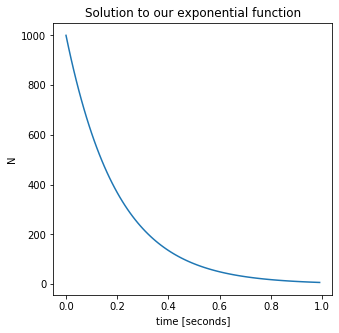

In [1]:
# Import the packages we need
import numpy as np # Import Numpy as usual
from scipy.integrate import odeint # We only want to use the 'odeint' [Solve Initial Value Problems] from the scipy.integrate package
import matplotlib.pyplot as plt # Import Matplotlib so we can plot results

# Set some initial conditions and paramter values
Gamma = 5.0 # Our decay constant
No = 1000 # Our initial value for 'N'
t = np.arange(0, 1, 0.01) # time span and steps (start, end, length between each value). This will have 100 entries

# Define a function that gives us the value for the differential equation
# Notice the variables passed to the function and, again, the use of the ':' operator and subsequent space underneath
def differential_function(N, t):
    return -1.0*Gamma*N # Does this match with the differential equation given above?

# Solve the differential equation using the 'odeint' package
# A couple of things to note here:
# 1 - The ODE solver expects key information on starting conditions and the length [duration] of our integration
# 2 - The ODE solver returns an array which gives N as one column and time [t] as the other, so we can plot this below
solution = odeint(differential_function, No, t) # integrate, refer scipy docs

# To plot the results we can do the following:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
ax.plot(t,solution)
ax.set_title('Solution to our exponential function')
ax.set_ylabel('N')
ax.set_xlabel('time [seconds]')
    

<div class="alert alert-block alert-success">
<b> Exercise 1: Integrate an exponential decay equation </b>   <a name="Exercise1"></a>
    
To continue on this theme, in this first practical I would like you to loop through 10 different values of our exponential decay coefficient and then plot the resulting decay curves on one graph. In the box below, you will see where code is missing to complete this task. Copy the relevant code from the example above and work on looping through the different values of the decay coefficient. You will need to carry out the following operations:

 - Import the required libraries
 - Initialise an array that will store all of the decay values for each choice of decay coefficient
 - Loop through calling the ODE solver for each choice of decay coefficient
 - Update the array that stores all of the decay values 
 - Plot the results
 
You should arrive at a graph as shown in the following figure:

![](images/Practical5_decay_example.png "Title") 
 
If you have any questions, do not hesistate to ask in class. Also please feel free to check the proposed solution provided.

</div>

Text(0.5, 0, 'time [seconds]')

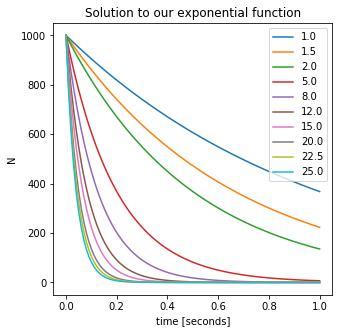

In [2]:
# Import packages needed
import numpy as np # Import Numpy as usual
from scipy.integrate import odeint # We only want to use the 'odeint' [Solve Initial Value Problems] from the scipy.integrate package
import matplotlib.pyplot as plt # Import Matplotlib so we can plot results

# Set some initial conditions and parameter values
# In this example we are going to create an array that holds 10 values for our decay constant between 1 to 25.
# Lets create an emtpy array and manually place some values in it
Gamma_array = np.zeros((10), dtype=float)
Gamma_array[0]=1.0
Gamma_array[1]=1.5
Gamma_array[2]=2.0
Gamma_array[3]=5.0
Gamma_array[4]=8.0
Gamma_array[5]=12.0
Gamma_array[6]=15.0
Gamma_array[7]=20.0
Gamma_array[8]=22.5
Gamma_array[9]=25.0

No = 1000 # Our initial value for 'N' will remain as 1000
t = np.linspace(0, 1, num=100) # time span and steps (start, end, number of entries). Same as before, with 100 entries

# We still need a function that calculates the derivative expression
def differential_function(N, t):
    return -1.0*Gamma*N 

# <<-------------------- INSERT CODE HERE ----------------------->>
# Create loop a that selects different values of the decay coefficient and calls the ODE solver.
# For each solution, store these values in a new 2D array. I will create this array for you since
# we know there are 100 entries in our time array and 10 decay constants
solution_store_array = np.zeros((100,10), dtype=float)

# Now define your loop. HINT, to access the contents of the 'solution' array as one column, you can write solution[:,0]
for i in range(10):
    Gamma=Gamma_array[i]
    solution = odeint(differential_function, No, t) # integrate, refer scipy docs
    solution_store_array[:,i] = solution[:,0]
# <<------------------------------------------------------------->>

# To plot the results we can use the following and Python will vary the colours of each line:
# Please ask about the way I have labeled each line if you would like to know
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
lineObjects = ax.plot(t,solution_store_array)
plt.legend(iter(lineObjects), ('1.0','1.5','2.0','5.0','8.0','12.0','15.0','20.0','22.5','25.0'))
ax.set_title('Solution to our exponential function')
ax.set_ylabel('N')
ax.set_xlabel('time [seconds]')


### Additional example: Implementing the Lorentz system 

In the above example, we have a differential equation describing how one variable changes over time. More often than not we study systems where components interact. In part 2 we will look at a set of equations known as the predator - prey equations. Before we do that, let's look at general example of coupled differential equations known as the Lorentz system.  

\begin{eqnarray} 
\frac{dX}{dt} = &\sigma(Y-X)\\ 
\frac{dY}{dt} = &(\rho-Z)X - Y\\ 
\frac{dZ}{dt} = &XY-\beta Z 
\end{eqnarray}

There is alot of background behind the real-world relevance of this set of coupled differential equations. Briefly,it is a system of ordinary differential equations studied by Edward Lorenz who was an American mathematician and meteorologist. You may have come across a saying relating to the potential chaos caused by a butterfly flapping its wings, also known as the 'butterfly effect'? This refers to physical systems that, despite following robust mathematical laws, exhibit chaotic behaviour from even minuscule changes in initial conditions. 

In English, the equations state the following:

 - The rate of change of component 'X' is a function of some constant $\sigma$ multiplied by component 'Y' minus 'X'
 - The rate of change of component 'Y' is a function of some constant $\rho$ minus component 'Z', the product of which is multiplied bu component 'X'. Then subtract component 'Y'
 - The rate of change of component 'Z' is a funcrion of 'X' multiplied by 'Y', minus a constant $\beta$ times 'Z'
 
So we have 3 variables we need to consider. As we will demonstrate below, rather than pass a single variable to the ODE solver and thus our derivative function, we can pass multiple variables via an array.  

The code below shows the full example and then produces a 3D plot of <code> X </code> , <code> Y </code> and <code> Z </code> to give the typical Lorentz attractor visualisation:

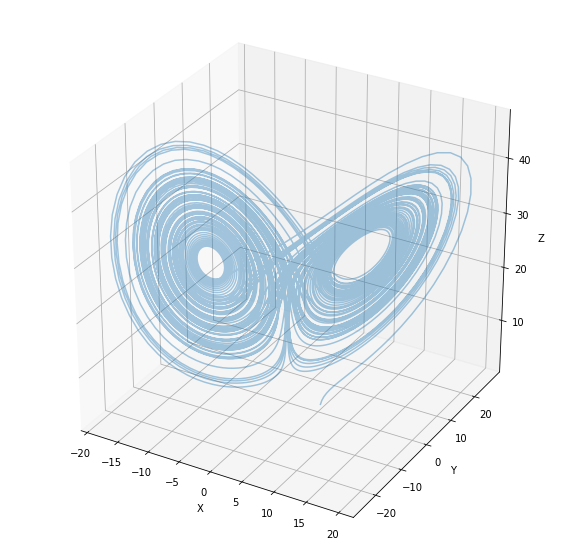

In [3]:
# import libraries we need
import numpy as np # Import Numpy as usual
from scipy.integrate import odeint # We only want to use the 'odeint' [Solve Initial Value Problems] from the scipy.integrate package
import matplotlib.pyplot as plt # Import Matplotlib so we can plot results
from mpl_toolkits.mplot3d import Axes3D #Import another package that allows us to plot 'nice' 3D plots

# Set Lorenz paramters and initial conditions
sigma = 10 
beta = 2.667 
rho = 28
X0 = 5
Y0 = 1 
Z0 = 1.05

# Define the differential equation function the ODE solver will use
def differential_function(array, t):
    # Notice here the function receives an array which has 3 cells
    # Outside of this function we have decided that the 1st component is X
    # .. the 2nd is Y and the 3rd is Z. Thus below we access those elements
    # using Python indexing
    X = array[0]
    Y = array[1]
    Z = array[2]
    # The Lorenz equations
    # Im using 3 new variables, with a name that hopefully makes sense.
    # These follow the equations displayed above this box
    dX_dt = sigma*(Y - X)
    dY_dt = (rho-Z)*X-Y
    dZ_dt = X*Y-beta*Z
    
    # We now return another array, but this contains the values for each derivative. The ordering
    # has to be the same order as the variables in 'array'
    return [dX_dt, dY_dt, dZ_dt]


t = np.linspace(0, 100, num=10000) # time span and steps (start, end, number of entries). Same as before, with 100 entries

# Integrate the Lorenz equations 
# Solve the differential equation using the 'odeint' package
# A couple of things to note here, again:
# 1 - The ODE solver expects key information on starting conditions and the length [duration] of our integration
# 2 - The ODE solver returns an array which gives N as one column and time [t] as the other, so we can plot this below
solution = odeint(differential_function, (X0, Y0, Z0), t)
# As we are now passing an array of variables, the function will return an array of each variable value at the given time stamps defined by our 't' variables
x = solution[:,0] # X is the first variable in our array, thus first column in our output
y = solution[:,1] # Y is the second variable in our array, thus second column in our output
z = solution[:,2] # Z is the third variable in our array, thus third column in our output

# Plot the Lorenz attractor using a Matplotlib 3D projection
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(x, y, z, alpha=0.4) #Please note the parameter 'alpha' here defines a level of transparency.
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


Why not change the following variables and see how the image responds?

 - Change $\beta$ to 4.0
 - Change the number of time steps to 1000
 
In Exercise 2 we will now introduce another set of coupled equations. 


<div class="alert alert-block alert-success">
<b> Exercise 2 : Implementing the Predator-Prey equations, or the Lotka-Volterra model. </b> <a name="Exercise2"></a>

This example is taken straight from the ['cookbook' of the Python package Scipy](https://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html). We will have a look at the Lotka-Volterra model, also known as the predator-prey equations. This model comprises a pair of first order, non-linear, differential equations frequently used to describe the dynamics of biological systems in which two species interact; one a predator and the other its prey. The model was proposed independently by Alfred J. Lotka in 1925 and Vito Volterra in 1926. 

The equations are presented as follows:  

\begin{equation*}
\frac{dU}{dt} = aU - bUV \\
\frac{dV}{dt} = -cV + dbUV
\end{equation*}

Where the variables and constant parameters are defined as follows:
 - U: number of preys (for example, rabbits)
 - V: number of predators (for example, foxes)
 - a is the natural growing rate of rabbits, when there's no fox
 - b is the natural dying rate of rabbits, due to predation by foxes
 - c is the natural dying rate of fox, when there's no rabbit
 - d is the factor describing how many caught rabbits lead to an increased population of foxes. Note the similarity with the predation rate in the first equation.
 
 
How do we solve these equations? As with the first example, we can use the ODE solvers in the Scipy package. To do this we need to perform the following actions and then implement these as code:

 - create some initial conditions that define our starting populations of rabbits and foxes
 - define the constant parameters a,c,c and d
 - set up the function that defines our differential equations and is called by the internal ODE solver
 - run the simulation for a period of time
 - plot the results.

In this example we provide the template to import the libraries needed and plot the results, but you are tasked with completing the code and running the simulation. You should see an identical graph to the figure below. 

![](images/Practical5_example_predator.png "Title") 

</div>

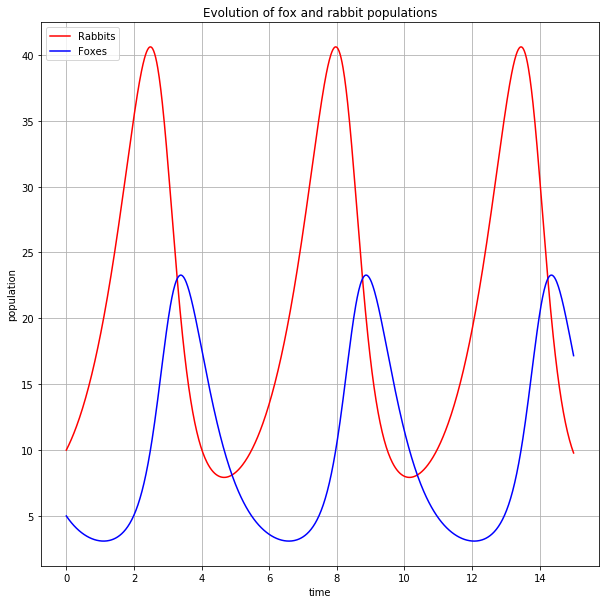

In [4]:
# import libraries we need
import numpy as np # Import Numpy as usual
from scipy.integrate import odeint # We only want to use the 'odeint' [Solve Initial Value Problems] from the scipy.integrate package
import matplotlib.pyplot as plt # Import Matplotlib so we can plot results
from mpl_toolkits.mplot3d import Axes3D #Import another package that allows us to plot 'nice' 3D plots

#-------'INSERT CODE HERE'-------
# Definition of parameters
a = 1.
b = 0.1
c = 1.5
d = 0.75
U0 = 10
V0 = 5

def differential_equations(array, t):
    U = array[0]
    V = array[1]
    dU_dt = a*U - b*U*V 
    dV_dt = -c*V + d*b*U*V
    return [dU_dt,dV_dt]
#--------------------------------


t = np.linspace(0, 15, num=1000) # time span and steps (start, end, number of entries). Same as before, with 100 entries

# Integrate the Lorenz equations 
# Solve the differential equation using the 'odeint' package
# A couple of things to note here, again:
# 1 - The ODE solver expects key information on starting conditions and the length [duration] of our integration
# 2 - The ODE solver returns an array which gives N as one column and time [t] as the other, so we can plot this below
solution = odeint(differential_equations, (U0, V0), t)
# As we are now passing an array of variables, the function will return an array of each variable value at the given time stamps defined by our 't' variables
rabbits = solution[:,0] # X is the first variable in our array, thus first column in our output
foxes = solution[:,1] # Y is the second variable in our array, thus second column in our output

# Plot the Lorenz attractor using a Matplotlib 3D projection
fig = plt.figure(figsize=(10,10))
plt.plot(t, rabbits, 'r-', label='Rabbits')
plt.plot(t, foxes  , 'b-', label='Foxes')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')
plt.show()